Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline



In [9]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing

#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [10]:
# Code here
movies_df.drop(["homepage", "keywords","original_language", "original_title", "overview", "production_companies", "status", "tagline"],axis=1,inplace=True)


In [11]:
# Save the cleaned dataset (optional)
movies_df.to_csv('path_to_save_cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print(movies_df.head())

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoke

#### Remove any duplicate rows

In [12]:
# Remove duplicate rows
movies_df = movies_df .drop_duplicates()

# Save the cleaned dataset (optional)
movies_df .to_csv('path_to_save_cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print(movies_df .head())

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoke

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [13]:
# Remove rows with zero budget or zero revenue
movies_df = movies_df [(movies_df ['budget'] > 0) & (movies_df ['revenue'] > 0)]

# Save the cleaned dataset (optional)
movies_df .to_csv('path_to_save_cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print(movies_df .head())

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoke

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [14]:


# Convert 'release_date' to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract year from 'release_date' and create a new column 'release_year'
movies_df['release_year'] = movies_df['release_date'].dt.year

# Display the first few columns to verify changes
print(movies_df[['release_date','release_year']])

# Save the updated dataset if needed
movies_df.to_csv('path_to_save_cleaned_dataset.csv', index=False)

     release_date  release_year
0      2009-12-10          2009
1      2007-05-19          2007
2      2015-10-26          2015
3      2012-07-16          2012
4      2012-03-07          2012
...           ...           ...
4773   1994-09-13          1994
4788   1972-03-12          1972
4792   1997-11-06          1997
4796   2004-10-08          2004
4798   1992-09-04          1992

[3229 rows x 2 columns]


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [15]:
# Convert 'budget' and 'revenue' columns to int64
movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['revenue'] = movies_df['revenue'].astype('int64')

# Display the first few rows to verify changes
print(movies_df.head())

# Save the updated dataset if needed
movies_df.to_csv('path_to_save_cleaned_dataset.csv', index=False)

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoke

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [16]:
# Convert from JSON format to a list of strings
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    movies_df[column] = movies_df[column].apply(lambda x: [item[key] for item in json.loads(x)])

# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')

print(movies_df[['title', 'genres', 'production_countries', 'spoken_languages']])





                                         title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4773                                    Clerks   
4788                            Pink Flamingos   
4792                                      Cure   
4796                                    Primer   
4798                               El Mariachi   

                                             genres  \
0     [Action, Adventure, Fantasy, Science Fiction]   
1                      [Adventure, Fantasy, Action]   
2                        [Action, Adventure, Crime]   
3                  [Action, Crime, Drama, Thriller]   
4              [Action, Adventure, Science Fiction]   
...                                             ...   
4773          

In [17]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
1567,35000000,"[Horror, Comedy, Romance]",82654,43.742241,[Canada],2013-01-31,116980662,97.0,[English],Warm Bodies,6.4,2652,2013


### Finding Certain Genres
Locate all movies in the "Action" genre. 


In [18]:
# Filter the DataFrame to find all movies that belong to the "Action" genre
action_movies = movies_df[movies_df['genres'].apply(lambda x: 'Action' in x)]

# Display the filtered DataFrame
print(action_movies[['title', 'genres']])



                                         title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4664                                   Bronson   
4670                                   Mad Max   
4701         Sweet Sweetback's Baadasssss Song   
4772                              Down Terrace   
4798                               El Mariachi   

                                              genres  
0      [Action, Adventure, Fantasy, Science Fiction]  
1                       [Adventure, Fantasy, Action]  
2                         [Action, Adventure, Crime]  
3                   [Action, Crime, Drama, Thriller]  
4               [Action, Adventure, Science Fiction]  
...                                              ...  
4664          

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [19]:
# Find the 5 most expensive movies
most_expensive_movies = movies_df.sort_values(by='budget', ascending=False).head(5)

# Display the most expensive movies
print(most_expensive_movies[['title','budget']])





                                          title     budget
17  Pirates of the Caribbean: On Stranger Tides  380000000
1      Pirates of the Caribbean: At World's End  300000000
7                       Avengers: Age of Ultron  280000000
10                             Superman Returns  270000000
6                                       Tangled  260000000


In [20]:
# Find the 5 cheapest movies (with non-zero budgets)
cheapest_movies = movies_df[movies_df['budget'] > 0].sort_values(by='budget', ascending=True).head(5)

# Display the cheapest movies
print(cheapest_movies[['title','budget']])




                   title  budget
4238        Modern Times       1
3611  A Farewell to Arms       4
3372        Split Second       7
3419        Bran Nue Dae       7
4608        The Prophecy       8


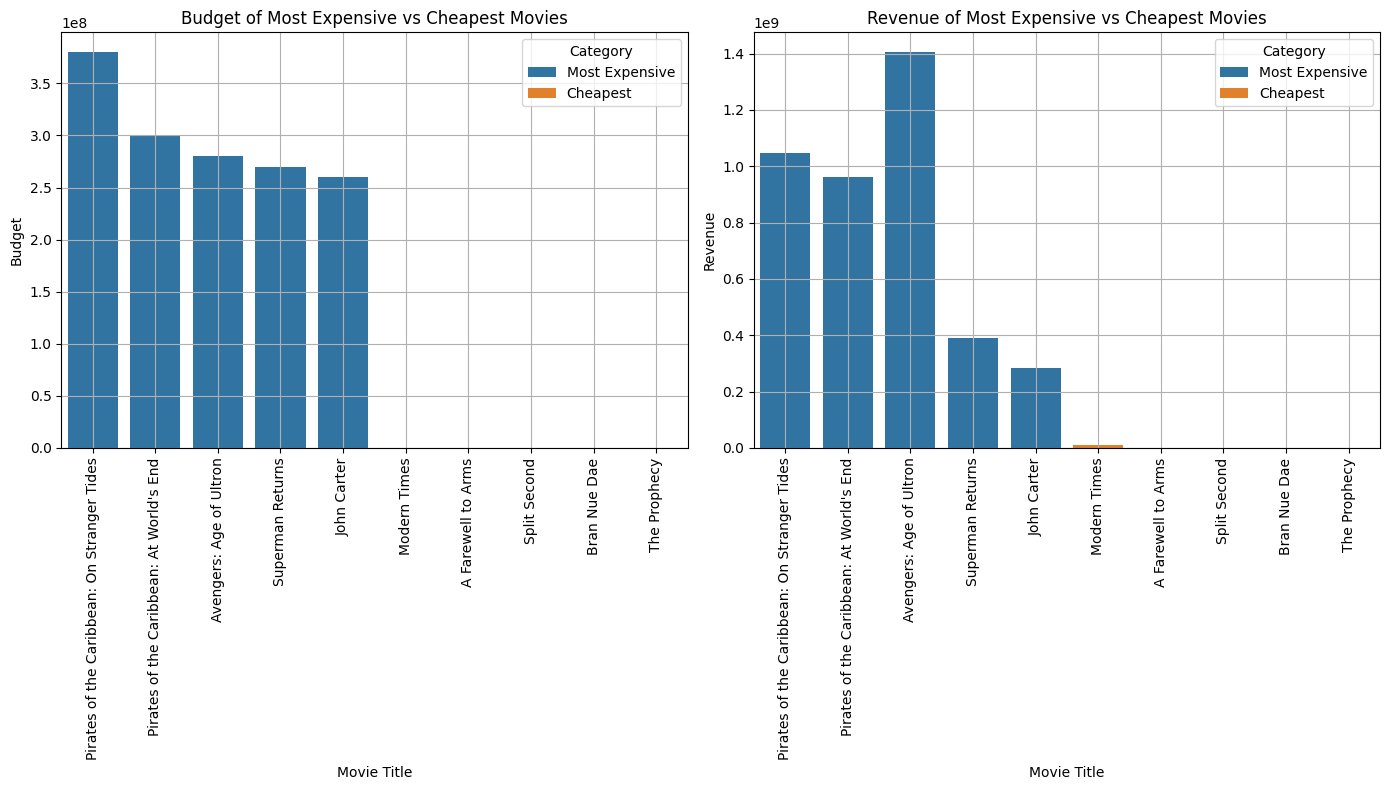

In [21]:
# Comparison analysis between the most expensive and cheapest movies
# Data for most expensive movies
most_expensive_movies = movies_df.nlargest(5, 'budget')

# Data for cheapest movies (excluding movies with zero budget)
cheapest_movies = movies_df[movies_df['budget'] > 0].nsmallest(5, 'budget')

# Combining most expensive and cheapest movies data
combined_movies = pd.concat([most_expensive_movies, cheapest_movies])
combined_movies['Category'] = ['Most Expensive'] * 5 + ['Cheapest'] * 5

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot the budget
plt.subplot(1, 2, 1)
sns.barplot(data=combined_movies, x='title', y='budget', hue='Category')
plt.title('Budget of Most Expensive vs Cheapest Movies')
plt.xlabel('Movie Title')
plt.ylabel('Budget')
plt.xticks(rotation=90)
plt.grid(True)

# Plot the revenue
plt.subplot(1, 2, 2)
sns.barplot(data=combined_movies, x='title', y='revenue', hue='Category')
plt.title('Revenue of Most Expensive vs Cheapest Movies')
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

### Budget Chart:

This chart shows the budgets of the most expensive and cheapest movies.
The most expensive movies have significantly higher budget bars compared to the cheapest movies.

### Revenue Chart:

This chart shows the revenue generated by the most expensive and cheapest movies.
The high budget of the most expensive movies translated into higher revenue compared to the cheaper movies.

### Popularity of most expensive and cheapest movies 


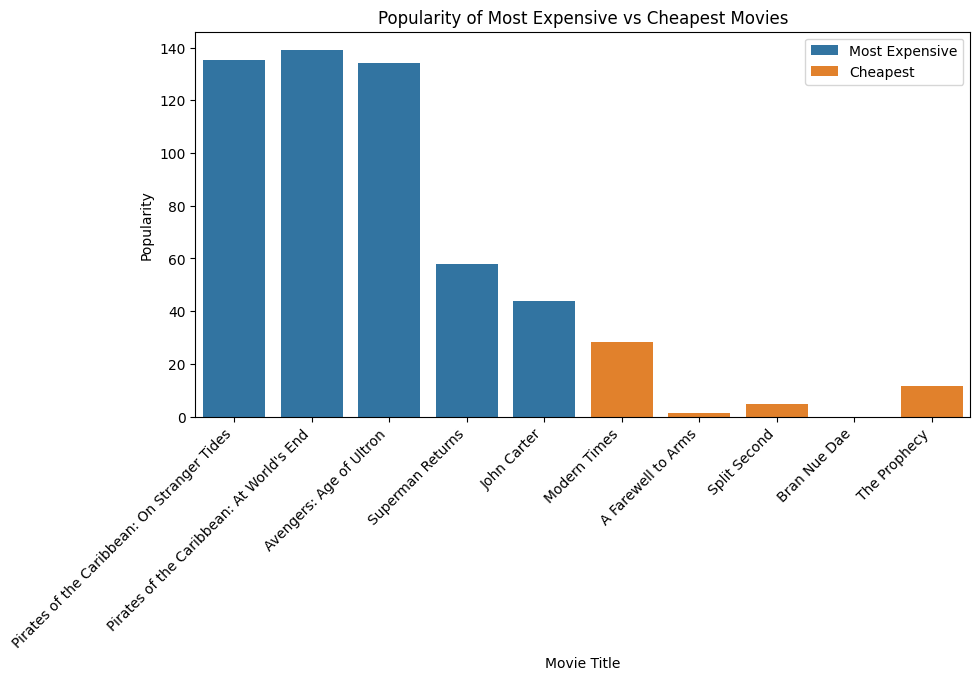

In [22]:
# Popularity Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(data=combined_movies, x='title', y='popularity', hue='Category')
plt.title('Popularity of Most Expensive vs Cheapest Movies')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.show()


### Popularity of most expensive and cheapest movies 

1.Popularity Scores of Most Expensive Movies:

Most expensive movies tend to have higher popularity scores, with values ranging from 48.68 to 139.08.
This indicates that movies with higher budgets are generally more popular among audiences. This could be due to factors such as higher production quality, better marketing and promotional activities, involvement of well-known actors and directors, and larger distribution networks.

2. Popularity Scores of Cheapest Movies:

Cheapest movies have lower popularity scores, ranging from 0.05 to 28.28.
This suggests that movies with lower budgets typically have less popularity. The lower popularity could be attributed to limited marketing budgets, smaller distribution networks, lower production quality, and potentially lesser-known actors and directors. Despite this, some low-budget movies can still achieve a certain level of popularity, possibly due to unique or compelling storytelling, niche market appeal, or word-of-mouth recommendations.

### Vote Average of Most Expensive vs  Cheapest movies 

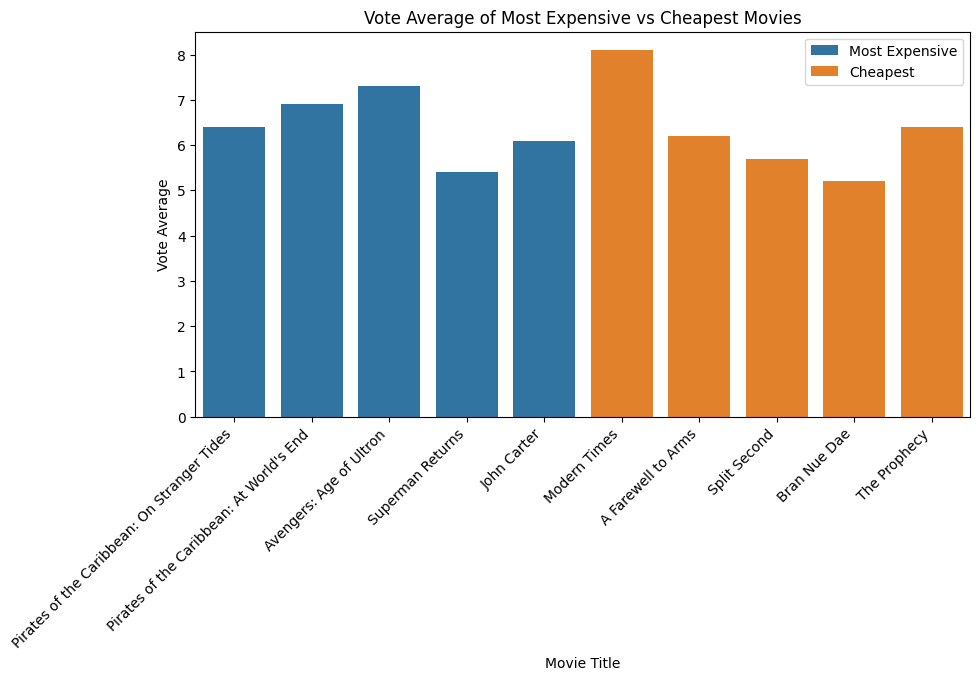

In [23]:
# Vote Average Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(data=combined_movies, x='title', y='vote_average', hue='Category')
plt.title('Vote Average of Most Expensive vs Cheapest Movies')
plt.xlabel('Movie Title')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.show()

### Vote Average of Most Expensive vs  Cheapest movies 

1. Vote Averages of Most Expensive Movies:

The most expensive movies have vote averages ranging from 5.4 to 7.4.
This range indicates that high-budget movies generally receive moderate to good ratings from audiences. The vote average suggests that while these movies are often popular and widely viewed, they may not always receive the highest critical acclaim. Factors contributing to these ratings could include high expectations set by large budgets, which might not always be met, or a focus on broad appeal that sometimes sacrifices depth or innovation in storytelling.

2. Vote Averages of Cheapest Movies:

The cheapest movies have vote averages ranging from 5.2 to 8.1, with "Modern Times" having a notably high vote average of 8.1.
This range shows that low-budget movies can achieve both low and high ratings. The presence of a movie like "Modern Times" with an 8.1 vote average demonstrates that some low-budget films can achieve significant critical acclaim, likely due to unique storytelling, creativity, and quality content that resonates with audiences. This highlights the potential for low-budget films to succeed critically, even if they do not have extensive financial resources.

### Vote Count of Most Expensive vs Cheapest Movies 

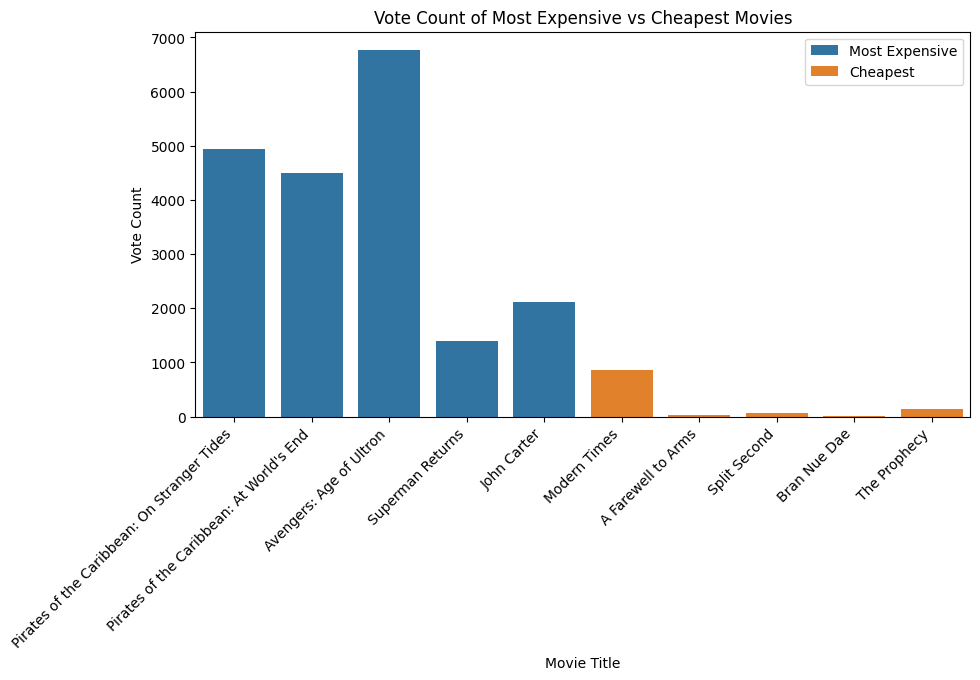

In [24]:
# Vote Count Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(data=combined_movies, x='title', y='vote_count', hue='Category')
plt.title('Vote Count of Most Expensive vs Cheapest Movies')
plt.xlabel('Movie Title')
plt.ylabel('Vote Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.show()

### Vote Count of Most Expensive vs Cheapest Movies 

1. Vote Counts of Most Expensive Movies:

The most expensive movies have higher vote counts, ranging from 1400 to 6767.
 High-budget movies typically attract more viewers, which is reflected in the higher vote counts. This can be attributed to several factors, such as extensive marketing campaigns, wide release in theaters, high-profile cast and crew, and overall greater visibility. The higher vote counts indicate that these movies are widely watched and discussed, contributing to their popularity.


Vote Counts of Cheapest Movies:

The cheapest movies have significantly lower vote counts, ranging from 6 to 856.
 Low-budget movies generally have fewer viewers, leading to lower vote counts. This could be due to limited marketing budgets, restricted release in theaters or availability on platforms, lesser-known cast and crew, and overall lower visibility. Despite this, some low-budget movies can still gather a respectable number of votes, likely through niche audience appeal or word-of-mouth.


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [25]:
# Assuming movies_df is your DataFrame with 'budget' and 'revenue' columns

# Calculate profit
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Save the updated dataset if needed
movies_df.to_csv('path_to_save_cleaned_dataset.csv', index=False)

# Filter out movies with non-positive profits (assuming you want profitable movies with non-zero budgets)
Profitable_movies = movies_df[movies_df['profit'] > 0]

# Find the top 5 profitable movies
top_5_profitable_movies = Profitable_movies.sort_values(by='profit', ascending=False).head(5)


# Display the top 5 profitable movies
print(top_5_profitable_movies[['title','budget', 'revenue', 'profit']])

             title     budget     revenue      profit
0           Avatar  237000000  2787965087  2550965087
25         Titanic  200000000  1845034188  1645034188
28  Jurassic World  150000000  1513528810  1363528810
44       Furious 7  190000000  1506249360  1316249360
16    The Avengers  220000000  1519557910  1299557910


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [26]:
# Sort the DataFrame by 'popularity' in descending order
most_popular_movies = movies_df.sort_values(by='popularity', ascending=False)

# Display the sorted DataFrame
print(most_popular_movies[['title', 'popularity']])


                                                title  popularity
546                                           Minions  875.581305
95                                       Interstellar  724.247784
788                                          Deadpool  514.569956
94                            Guardians of the Galaxy  481.098624
127                                Mad Max: Fury Road  434.278564
...                                               ...         ...
4065                                       Mi America    0.039007
2970                               There Goes My Baby    0.037073
3225                                            Limbo    0.034259
4105  The Book of Mormon Movie, Volume 1: The Journey    0.031947
3921                            Woman Thou Art Loosed    0.019984

[3229 rows x 2 columns]


#### Find Movies which are rated above 7

In [27]:
# Filter movies rated above 7
high_rated_movies = movies_df[movies_df['vote_average'] > 7]

# Display the high rated movies
print(high_rated_movies[['title', 'vote_average']])




                                       title  vote_average
0                                     Avatar           7.2
3                      The Dark Knight Rises           7.6
6                                    Tangled           7.4
7                    Avengers: Age of Ultron           7.3
8     Harry Potter and the Half-Blood Prince           7.4
...                                      ...           ...
4713                              Roger & Me           7.4
4724                              Eraserhead           7.5
4738                                      Pi           7.1
4773                                  Clerks           7.4
4792                                    Cure           7.4

[637 rows x 2 columns]


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

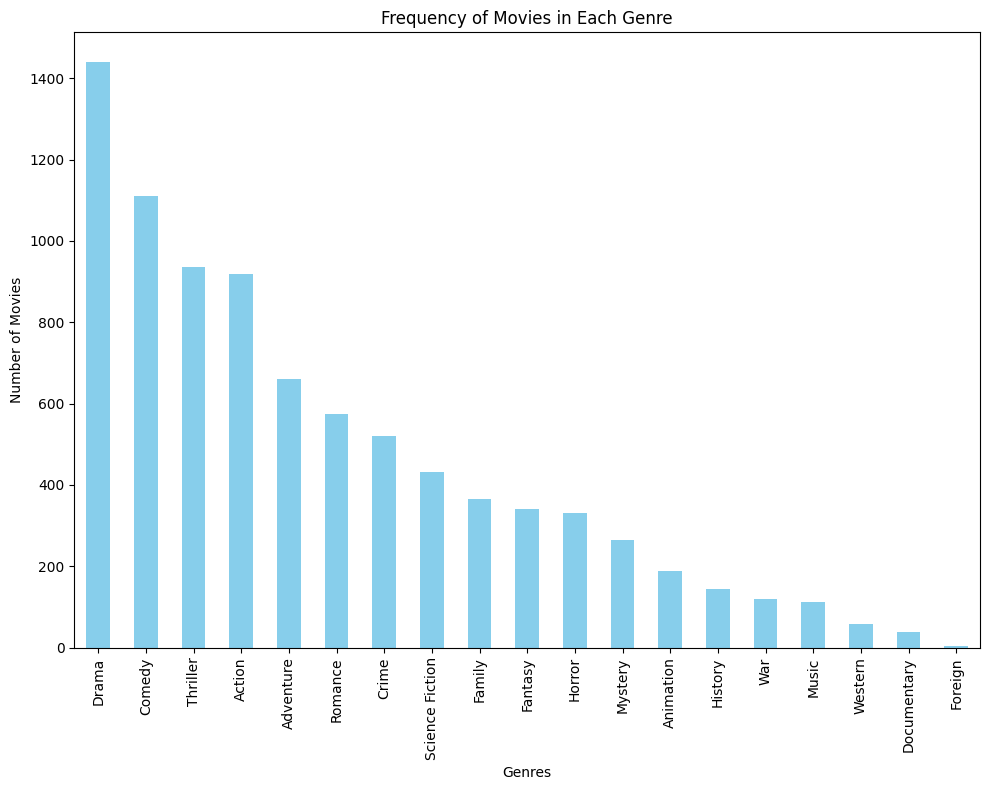

In [28]:


# Explode the genres column to have each genre in a separate row
movies_df_exploded = movies_df.explode('genres')

# Count the frequency of each genre
genre_counts = movies_df_exploded['genres'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
ax = genre_counts.plot(kind='bar', color='skyblue')
ax.set_title('Frequency of Movies in Each Genre')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Movies')

# Rotate the x ticks to be vertical for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

### Most Succcessful genre

Most Common Genres:

The most frequent genre in the dataset is Drama, followed by Comedy and Thriller.
Drama's prevalence indicates its broad appeal and versatility, allowing for a wide range of storytelling styles and themes. Comedy and Thriller also feature prominently, reflecting their popularity among diverse audience segments. The frequent appearance of these genres suggests they are reliable choices for filmmakers looking to attract a large audience.


Least Common Genres:

The least frequent genres in the dataset are Foreign, Documentary, and Western.
 The lower number of movies in these genres could be due to niche audience appeal or limited market demand. Foreign films may face language and cultural barriers, while Documentaries, though often critically acclaimed, may attract a smaller, more specific audience. Westerns, once a popular genre, have seen a decline in production and popularity in recent years.


### Number of Action movies released each year

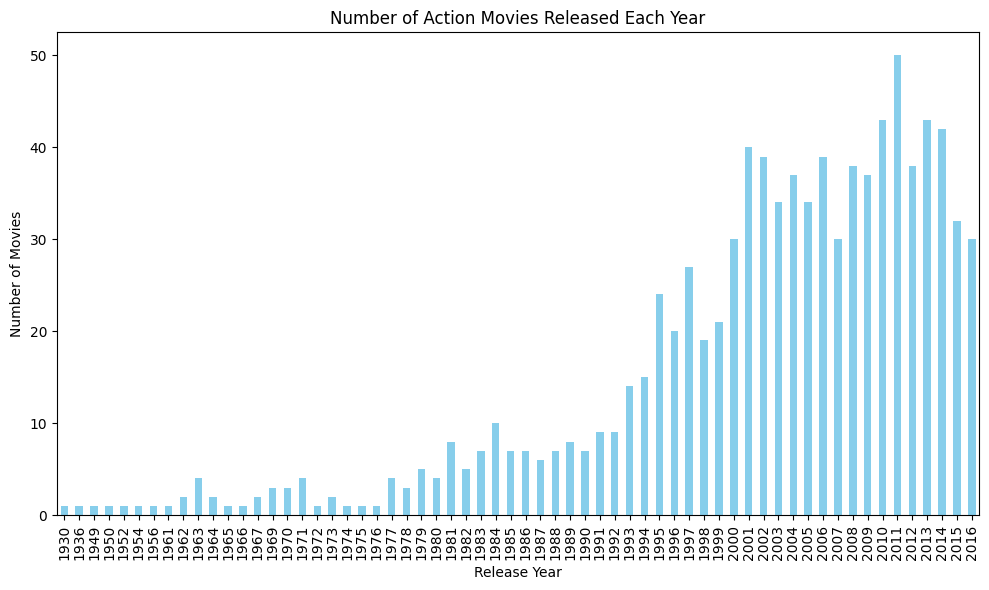

In [29]:
action_movies_by_year = action_movies['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
action_movies_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Action Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Number of action movies released each year

From 1930 to 1961, the number of action movies released each year was relatively constant.
During this period, the film industry was still in its early stages of development, and the production of action movies was steady but not particularly high. This could be due to limited resources, fewer technological advancements, and a focus on other popular genres of the time such as musicals, dramas, and comedies.

There was a steady increase in the number of action movies from the 1960s to the mid-1990s.
The 1960s and onwards saw significant advancements in filmmaking technology and special effects, which made the production of action movies more feasible and appealing. The introduction of new cinematic techniques and the rise of action stars like Bruce Lee, Clint Eastwood, and Arnold Schwarzenegger contributed to the genre's growing popularity. Additionally, the increasing availability of televisions and home video systems allowed more people to access and enjoy action movies, further boosting their production.

There was an exponential increase in the number of action movies released from the late 1990s to 2020.
This period marks a golden age for the action genre, driven by several factors:

Advancements in Technology: The late 1990s and 2000s saw rapid advancements in CGI and other special effects technologies, enabling filmmakers to create more spectacular and visually appealing action sequences.

Blockbuster Culture: The rise of the blockbuster model, where studios invest heavily in high-budget action films expecting substantial returns, led to an increase in the number of action movies produced.

Global Audience: With the globalization of the film market, action movies, which often rely on visual spectacle rather than dialogue, became more accessible and popular worldwide.
 
Franchise Phenomenon: The success of action franchises like "James Bond," "Mission: Impossible," "Fast & Furious," and superhero movies from Marvel and DC significantly contributed to the increase in action movie productions.

In [30]:
# Group by genres and release_year and calculate the total profit
genre_year_profit = movies_df_exploded.groupby(['genres', 'release_year'])['profit'].sum().reset_index()

# Pivot the table to have years as columns and genres as rows
genre_year_profit_pivot = genre_year_profit.pivot(index='release_year', columns='genres', values='profit').fillna(0)


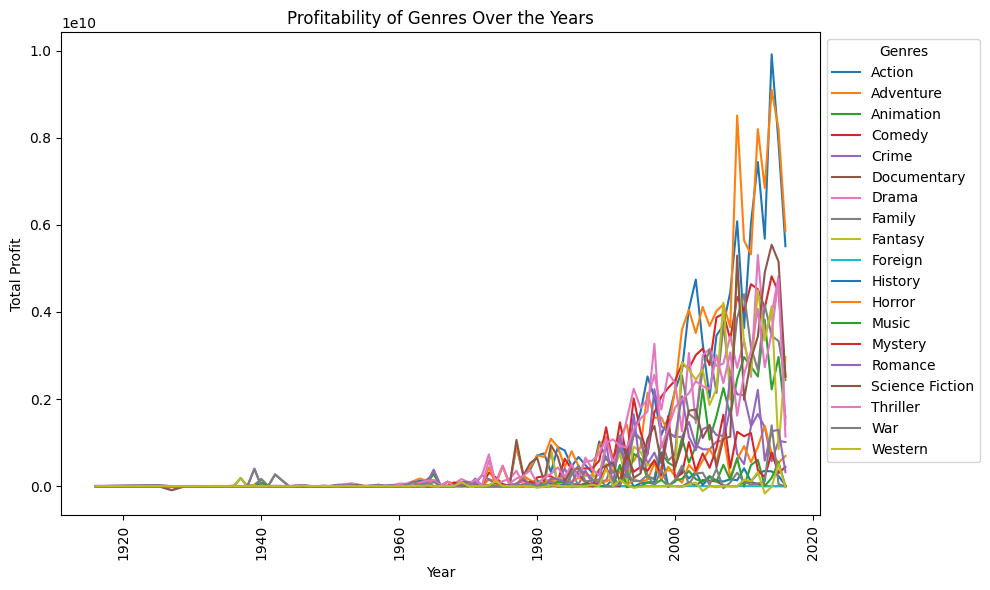

In [31]:

# Plotting
plt.figure(figsize=(10, 6))
for genre in genre_year_profit_pivot.columns:
    plt.plot(genre_year_profit_pivot.index, genre_year_profit_pivot[genre], label=genre)

plt.title('Profitability of Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Genres')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Profitability of Genres Over the Years

Historical Profit Trends:

The graph shows that all genres were not yielding huge profits from the period 1916 to around the 1970s.
This period may have seen lower overall production budgets and revenues, reflecting the early stages of the film industry when filmmaking technology and distribution channels were still developing. Additionally, fewer movies were produced during these early years, leading to less overall profit generation.

Exponential Growth in Profits:

There was exponential growth of profits from the 1970s to 2020.
Several factors contributed to this growth, including advances in filmmaking technology, improved special effects, the rise of blockbuster movies, and the expansion of global distribution networks. The introduction of home video, digital streaming, and international markets also played significant roles in increasing the profitability of movies.

Most Profitable Genres:

The most profitable genre is Action, followed by Adventure.
Interpretation: Action movies often have broad appeal due to their high-energy sequences, special effects, and star-studded casts. They attract large audiences globally, leading to substantial box office revenues. Adventure movies, with their captivating stories and expansive settings, also draw significant audience interest, contributing to their high profitability.

Least Profitable Genres:

The least profitable genre is Foreign. Foreign films may face challenges in reaching large audiences outside their native countries due to language barriers, cultural differences, and limited distribution channels. Consequently, they often generate lower revenues compared to mainstream genres like Action and Adventure.




### Revenue by production country 

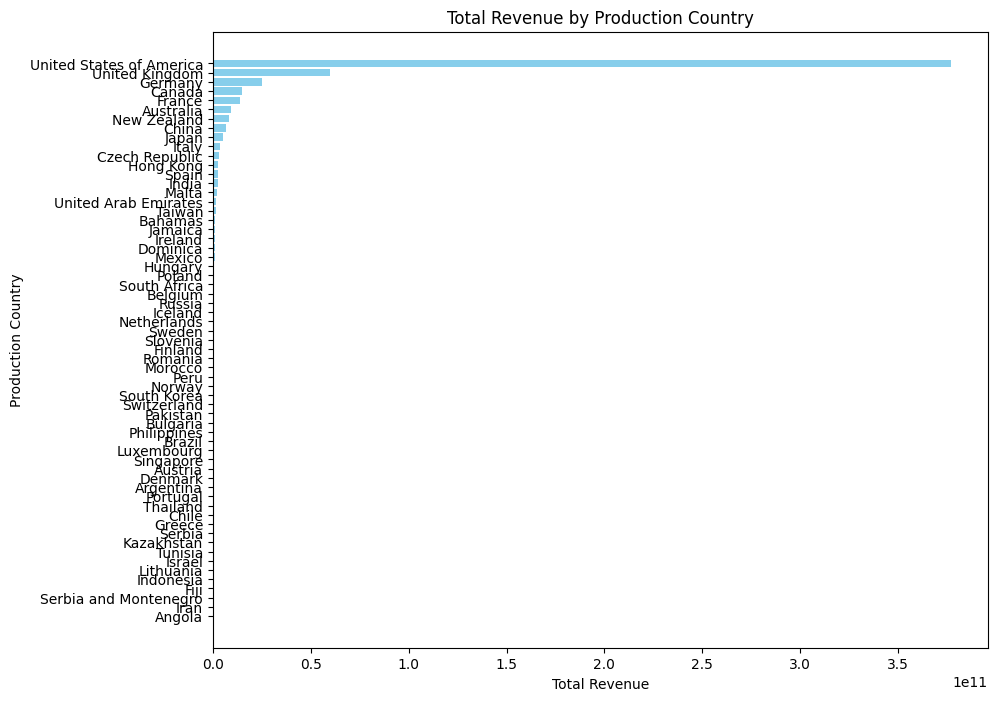

In [32]:

# Explode the production_countries column to separate rows for each country
movies_exploded = movies_df.explode('production_countries')

# Group by production country and calculate the total revenue
country_revenue = movies_exploded.groupby('production_countries')['revenue'].sum().reset_index()

# Sort the countries by total revenue in descending order
country_revenue_sorted = country_revenue.sort_values(by='revenue', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 8))
plt.barh(country_revenue_sorted['production_countries'], country_revenue_sorted['revenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Production Country')
plt.title('Total Revenue by Production Country')
plt.gca().invert_yaxis()  
plt.show()

### Revenue by production country 

1. Dominance of the United States:

The United States of America has the highest total revenue among production countries.
This suggests that Hollywood is the biggest and most influential film industry in the world. The high revenue generated by movies produced in the United States can be attributed to several factors, including advanced production technologies, extensive marketing strategies, and a wide distribution network that ensures global reach.

2. Hollywood's Global Impact:

 Even if we combine the revenues of films produced in other countries, the total would still be significantly lower than that of the United States.
 This might be attributed by Hollywood's ability to produce high-budget films with international appeal plays a crucial role in its dominance. The American film industry has established a strong brand identity that attracts audiences worldwide, leading to higher box office revenues.

3. Comparison with Other Countries:

 Films produced in other countries generally have lower total revenues compared to those from the United States. While other countries also produce high-quality films, they may face challenges in achieving the same level of international distribution and market penetration as Hollywood. Language barriers, cultural differences, and limited marketing budgets can also impact the revenue potential of films from these regions.